In [3]:
#IMPORTING THE DEPENDENCIES
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
#LOADING THE FILE FROM CSV FILE TO PANDAS DATAFRAME
sms_data=pd.read_csv('spam1.csv',encoding='latin1')

In [5]:
#DISPLAYING THE FIRST FIVE ROWS
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# DATA CLEANING

In [6]:
#EXTRACTING INFORMATION FROM DATASET
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#DISPLAYS THE NUMBER OF ROWS AND COLUMNS
sms_data.shape

(5572, 5)

In [8]:
#REMOVING LAST THREE COLUMNS FROM DATASET
sms_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
sms_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#RENAMING THE COLUMNS
sms_data.rename(columns={'v1':'Category','v2':'Message'},inplace=True)

In [11]:
sms_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
sms_data.shape

(5572, 2)

In [13]:
#GIVES THE TOTAL COUNT OF HAM AND SPAM MESSAGES IN THE DATASET
sms_data.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
#TO CHECK IF THERE ARE ANY MISSING VALUES
sms_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [15]:
#REPLACING 'SPAM'-0 AND 'HAM'-1
sms_data.loc[sms_data['Category'] == 'spam','Category',] = 0
sms_data.loc[sms_data['Category'] == 'ham','Category',] = 1

In [16]:
sms_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


# DATA VISUALIZATION

In [18]:
sms_data.Category.value_counts()
#1-Ham message
#0-Spam message

Category
1    4825
0     747
Name: count, dtype: int64

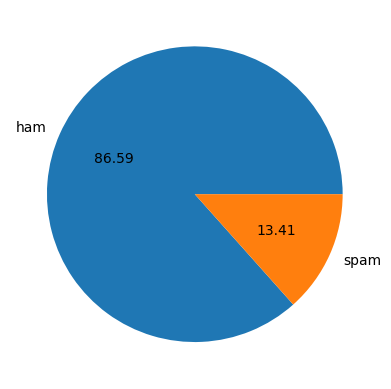

In [19]:
#TOTAL MEASURE OF HAM AND SPAM MESSAGES IN THE DATA SET
#PIECHART
import matplotlib.pyplot as plt
plt.pie(sms_data['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

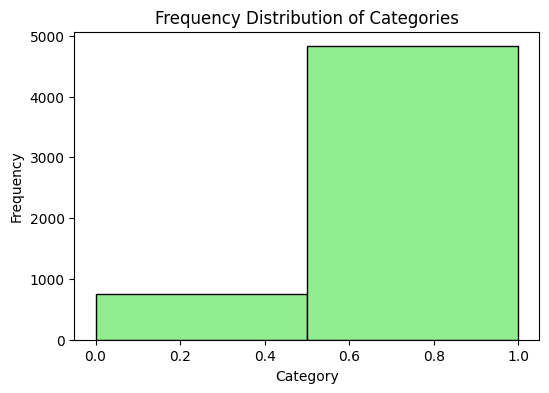

In [20]:
#HISTOGRAM- GIVES THE FREQUENCY DISTRIBUTION OF 'CATEGORY' COLUMN
plt.figure(figsize=(6, 4))
plt.hist(sms_data['Category'], bins=2, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [22]:
#SEPERATING THE DATA AS TEXT AND LABEL

In [23]:
X=sms_data['Message'] #TEXT 

Y=sms_data['Category'] #LABEL

In [24]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [25]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# TRAINING THE MODEL

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=3)

In [28]:
#PRINTING THE TOTAL NUMBER OF ROWS IN ORGINGAL TEXT DATA ,TRAIN DATA AND TEST DATA
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [29]:
#FEATURE EXTRACTION

In [30]:
#TRANFORMING THE TEXT DATA TO FEATURE VECTORS(NUMERICAL VALUES) THAT CAN BE USED AS INPUT TO LOGISTIC REGRESSION

In [31]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

#CONVERTING Y_TRAIN AND Y_TEST VALUES TO INTEGERS
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [32]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [33]:
#TRAINING THE MODEL
#LOGISTIC REGRESSION

In [34]:
model=LogisticRegression()

In [35]:
#TRAINING THE LOGISTIC REGRESSION MODEL WITH TRAINING DATA
model.fit(X_train_features,Y_train)

LogisticRegression()

In [36]:
#EVALUATING THE TRAINED MODEL

In [37]:
#PREDICTION ON TRAINING DATA
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [38]:
print("Accuracy on training data : ", accuracy_on_training_data)

Accuracy on training data :  0.9661207089970832


In [39]:
#PREDICTION ON TEST DATA

In [40]:
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [41]:
print("Accuracy on test data : ", accuracy_on_test_data)

Accuracy on test data :  0.9623318385650225


# BUILDING THE PREDICTIVE SYSTEM

In [43]:
input_message=["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
#CONVERTS THE INPUT MESSAGE TO FEATURE VECTORS
input_data_features=feature_extraction.transform(input_message)


#MAKING PREDICTIONS(IF PREDICTION IS 0-SPAM MESSAGE ,1-NON SPAM MESSAGE)
prediction=model.predict(input_data_features)
print(prediction)

if (prediction[0] == 1):
    print("Non-Spam message")
else:
    print("Spam message")

[1]
Non-Spam message


In [44]:
#TESTING THE MODEL TO PREDICT SPAM AND HAM MESSAGE
input_data=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

input_features=feature_extraction.transform(input_data)

prediction_data=model.predict(input_features)
print(prediction_data)

if prediction_data[0] == 1:
    print("Non-Spam message")
else:
    print("Spam message")

[0]
Spam message
